In [29]:
#https://flothesof.github.io/removing-background-scikit-image.html
from skimage import io as skio
my_path = "	raining_set\\bananas"
img = skio.imread(str(my_path)+'\\bimage13.jpg')

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("shape of image: {}".format(gray.shape))
print("dtype of image: {}".format(gray.dtype))

shape of image: (415, 620)
dtype of image: uint8


In [32]:
from skimage import filters
sobel = filters.sobel(gray)

In [33]:
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

In [34]:
# plt.imshow(sobel)

In [35]:
blurred = filters.gaussian(sobel, sigma=2.0)
# plt.imshow(blurred)

In [36]:
light_spots = np.array((gray > 245).nonzero()).T

In [37]:
light_spots.shape

(0, 2)

In [38]:
# plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
# plt.imshow(gray)
# plt.title('light spots in image')

In [39]:
dark_spots = np.array((gray < 3).nonzero()).T

In [40]:
dark_spots.shape

(32, 2)

In [41]:
# plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
# plt.imshow(gray)
# plt.title('dark spots in image')

In [42]:
from scipy import ndimage as ndi
bool_mask = np.zeros(gray.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

12

In [43]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
# plt.imshow(ws)

In [44]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

12

In [45]:
background_mask = (ws == background)
print(background_mask)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


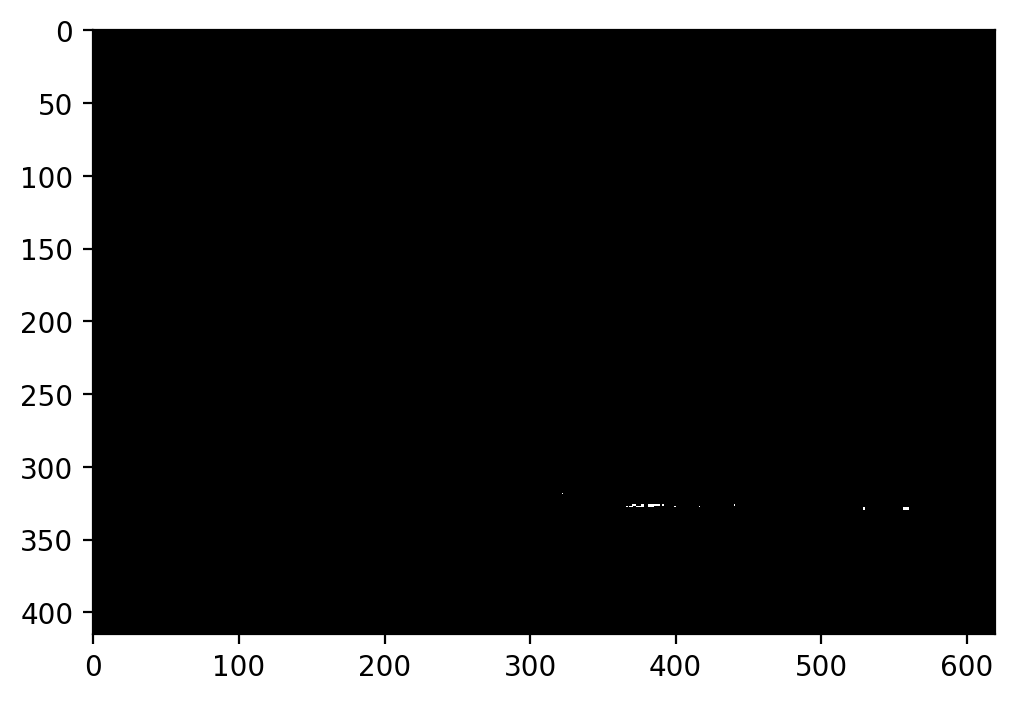

In [46]:
plt.imshow(~background_mask)

In [47]:
# cleaned = gray * ~background_mask
# plt.imshow(cleaned)

In [48]:
# plt.imshow(cleaned, cmap='gray')
# plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))

In [49]:
# c_rows = len(cleaned)
# c_cols = len(cleaned[0])
# rows = len(img)
# cols = len(img[0])

In [50]:
# cv2.imwrite("D:\git_work\git_repos\classifier1\\test_set\set2\cleaned.jpg", cleaned)

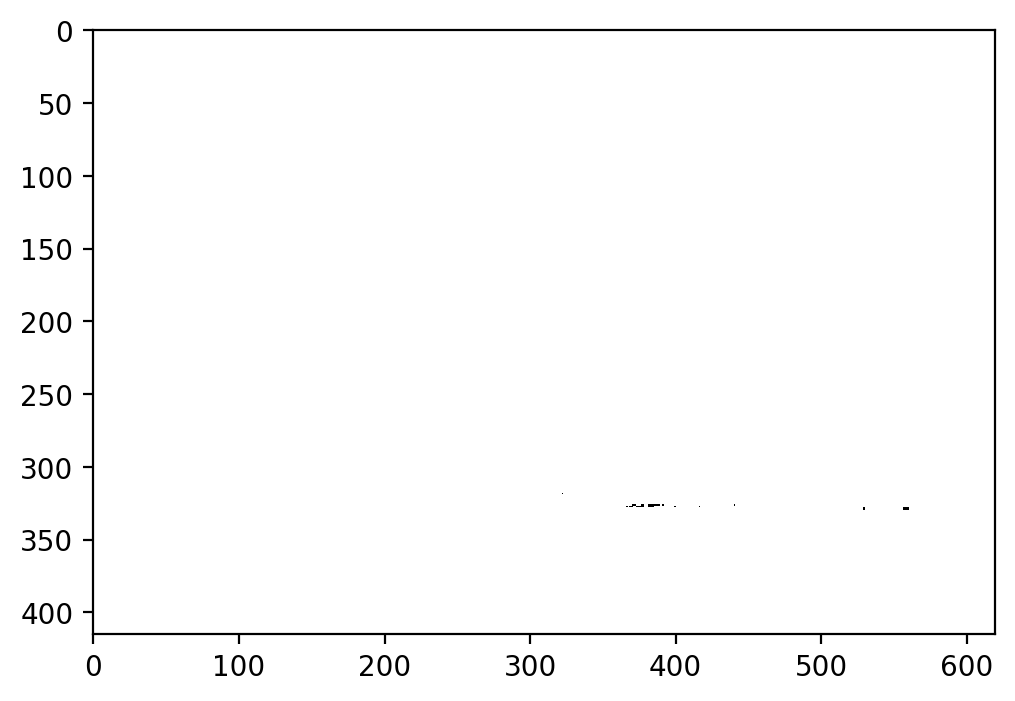

In [51]:
plt.imshow(background_mask)

In [52]:
rows = len(background_mask)
cols = len(background_mask[0])
for i in range(0, rows):
    for j in range(0, cols):
        if (background_mask[i][j] == 0):
            img[i][j][0] = 255
            img[i][j][1] = 255
            img[i][j][2] = 255
            


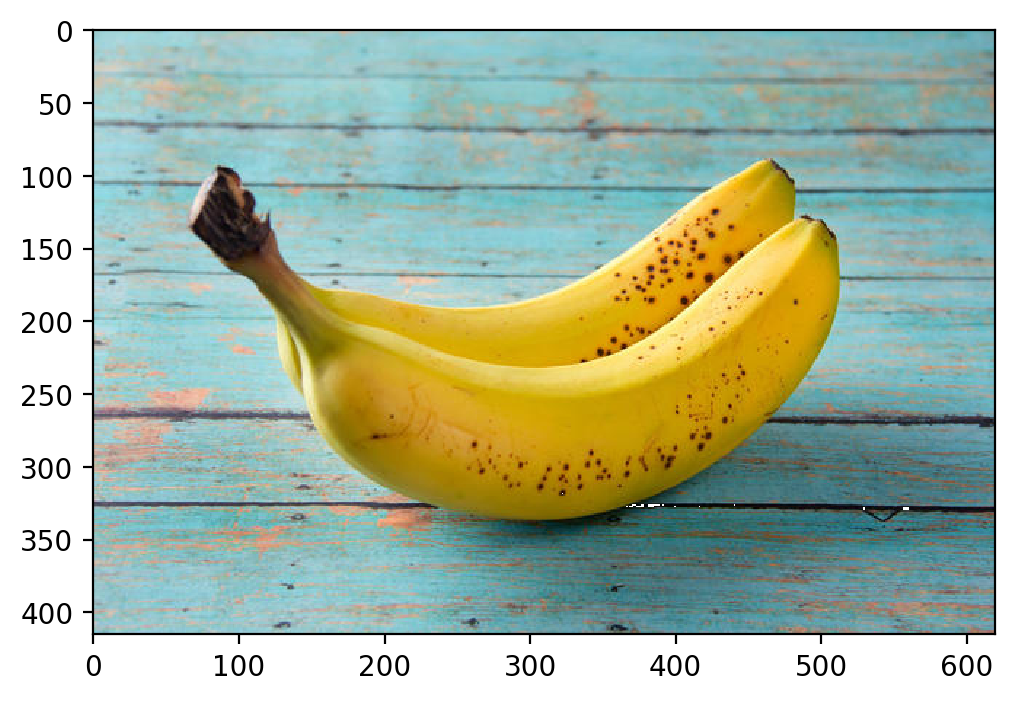

In [53]:
plt.imshow(img)
